In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [ ]:
from google.colab import drive


In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# !apt-get install openjdk-8-jdk-headless -qq > /dev/null
# !wget -q https://www-us.apache.org/dist/spark/spark-3.0.1/spark-3.0.1-bin-hadoop3.2.tgz
# !tar -xvf spark-3.0.0-preview2-bin-hadoop3.2.tgz
# !pip install -q findspark
# import os
# os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
# os.environ["SPARK_HOME"] = "/content/spark-3.0.1-bin-hadoop3.2"

E: Failed to fetch http://security.ubuntu.com/ubuntu/pool/universe/o/openjdk-8/openjdk-8-jre-headless_8u265-b01-0ubuntu2~18.04_amd64.deb  404  Not Found [IP: 91.189.88.142 80]
E: Failed to fetch http://security.ubuntu.com/ubuntu/pool/universe/o/openjdk-8/openjdk-8-jdk-headless_8u265-b01-0ubuntu2~18.04_amd64.deb  404  Not Found [IP: 91.189.88.142 80]
E: Unable to fetch some archives, maybe run apt-get update or try with --fix-missing?
tar: spark-3.0.0-preview2-bin-hadoop3.2.tgz: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now


In [ ]:
# !java -version
# !sudo update-alternatives --config java
# !java -version/

openjdk version "11.0.8" 2020-07-14
OpenJDK Runtime Environment (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1)
OpenJDK 64-Bit Server VM (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1, mixed mode, sharing)
There is only one alternative in link group java (providing /usr/bin/java): /usr/lib/jvm/java-11-openjdk-amd64/bin/java
Nothing to configure.
Unrecognized option: -version/
Error: Could not create the Java Virtual Machine.
Error: A fatal exception has occurred. Program will exit.


In [ ]:
# import findspark
# findspark.init()#'.\spark-3.0.1-bin-hadoop3.2'
# from pyspark.sql import SparkSession
# spark = SparkSession.builder.master("local[*]").getOrCreate()

# #importing libraries for spark mllib 
# from pyspark.ml import Pipeline
# from pyspark.ml.classification import DecisionTreeClassifier
# from pyspark.ml.feature import StringIndexer, VectorIndexer
# from pyspark.ml.evaluation import MulticlassClassificationEvaluator
# from pyspark.ml.feature import OneHotEncoder, StringIndexer
# from pyspark.ml.evaluation import RegressionEvaluator
# from pyspark.ml.recommendation import ALS
# from pyspark.sql import Row

ModuleNotFoundError: ignored

In [ ]:
import pandas as pd
from datetime import datetime
# from pyspark.sql.types import *

!pip install git+https://github.com/coreylynch/pyFM
import numpy as np
import pandas as pd
from datetime import datetime
import json
from tqdm import tqdm
from sklearn.preprocessing import MultiLabelBinarizer
import itertools
import scipy as sp
from sklearn.feature_extraction import DictVectorizer
from pyfm import pylibfm
from sklearn.preprocessing import normalize
from scipy import sparse

from numpy.linalg import norm
from sklearn.pipeline import FeatureUnion
#from transformers import *
from scipy.sparse import coo_matrix
#import simplejson as json
from datetime import datetime
#from sklearn.model_selection import cross_validate
#from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt


  Cloning https://github.com/coreylynch/pyFM to /tmp/pip-req-build-e0sdi090
  Running command git clone -q https://github.com/coreylynch/pyFM /tmp/pip-req-build-e0sdi090
  Created wheel for pyfm: filename=pyfm-0.0.0-cp36-cp36m-linux_x86_64.whl size=216848 sha256=c8e6b1a857a8235d6785ec6b53897056db0f153469edf196deb4047a08da8fa2
  Stored in directory: /tmp/pip-ephem-wheel-cache-fzg2ksbz/wheels/3b/d9/ef/1b148c527d39344632833679e79b3db1798a40b0f64f917b13
Successfully built pyfm


In [ ]:
#Importing Review Data
line_count = len(open("/content/drive/Shared drives/Fall2020DSGirlPower/SI650/project/DATA/yelp_academic_dataset_review.json").readlines())
user_ids, business_ids, stars, dates = [], [], [], []
with open("/content/drive/Shared drives/Fall2020DSGirlPower/SI650/project/DATA/yelp_academic_dataset_review.json") as f:
  for line in tqdm(f, total=line_count):
       blob = json.loads(line)
       user_ids += [blob["user_id"]]
       business_ids += [blob["business_id"]]
       stars += [blob["stars"]]
       dates += [blob["date"]]
ratings = pd.DataFrame(
   {"user_id": user_ids, "business_id": business_ids, "rating_rev": stars, "date": dates}
)
user_counts = ratings["user_id"].value_counts()
active_users = user_counts.loc[user_counts >= 5].index.tolist()


#Importing Business data
line_count = len(open("/content/drive/Shared drives/Fall2020DSGirlPower/SI650/project/DATA/yelp_academic_dataset_business.json").readlines())
business_ids, names, addresses, cities, states, postal_codes, latitudes, longitudes, stars, review_counts, is_open, attributes, categories, hours = [],[],[],[],[],[],[],[],[],[],[],[],[],[]
with open("/content/drive/Shared drives/Fall2020DSGirlPower/SI650/project/DATA/yelp_academic_dataset_business.json") as f:
  for line in tqdm(f, total=line_count):
        blob = json.loads(line)
        business_ids += [blob["business_id"]]
        names += [blob["name"]]
        addresses += [blob["address"]]
        cities += [blob["city"]]
        states += [blob["state"]]
        postal_codes += [blob["postal_code"]]
        latitudes += [blob["latitude"]]
        longitudes += [blob["longitude"]]
        stars += [blob["stars"]]
        review_counts += [blob["review_count"]]
        is_open += [blob["is_open"]]
        attributes += [blob["attributes"]]
        categories += [blob["categories"]]
        hours += [blob["hours"]]
businesses = pd.DataFrame(
    {"business_id": business_ids, "name": names, "address": addresses, "city": cities, "state": states, "postal_code": postal_codes, "latitude": latitudes, "longitude": longitudes, "rating_bus": stars, "review_count": review_counts, "is_open": is_open, "attributes": attributes, "categories": categories, "hours": hours}
)

#Imporing User data

line_count = len(open("/content/drive/Shared drives/Fall2020DSGirlPower/SI650/project/DATA/yelp_academic_dataset_user.json").readlines())
user_id, review_cnt, yelping_since, useful, funny, cool, fans, avg_user_rating, yrs_elite, \
compliment_hot, compliment_more, compliment_profile, compliment_cute, compliment_list, \
compliment_note, compliment_plain, compliment_cool, \
compliment_funny, compliment_writer, compliment_photos = [], [], [], [],[], [], [], [], [],[], [], [], [], [],[], [], [], [], [],[] 

with open("/content/drive/Shared drives/Fall2020DSGirlPower/SI650/project/DATA/yelp_academic_dataset_user.json") as f:
  for line in tqdm(f, total=line_count):
       blob = json.loads(line)
       user_id += [blob["user_id"]]
       review_cnt += [blob["review_count"]]
       yelping_since += [blob["yelping_since"]]
       useful += [blob["useful"]]
       funny += [blob["funny"]]
       cool += [blob["cool"]]
       fans += [blob["fans"]]
       avg_user_rating += [blob["average_stars"]]
       yrs_elite += [blob["elite"]]
       compliment_hot += [blob['compliment_hot']]
       compliment_more += [blob['compliment_more']]
       compliment_profile += [blob['compliment_profile']]
       compliment_cute += [blob['compliment_cute']]
       compliment_list += [blob['compliment_list']]
       compliment_note += [blob['compliment_note']]
       compliment_plain += [blob['compliment_plain']]
       compliment_funny += [blob['compliment_funny']]
       compliment_writer += [blob['compliment_writer']]
       compliment_photos += [blob['compliment_photos']]
user = pd.DataFrame(
   {"user_id": user_id, "review_cnt": review_cnt, "yelping_since": yelping_since, "useful": useful,"funny": funny,
    "cool": cool, "fans": fans, "avg_user_rating": avg_user_rating, "yrs_elite": yrs_elite, "compliment_hot": compliment_hot,
    "compliment_more": compliment_more, "compliment_profile": compliment_profile, "compliment_cute": compliment_cute,
   "compliment_list": compliment_list, "compliment_note": compliment_note, "compliment_plain": compliment_plain,
   "compliment_funny": compliment_funny, "compliment_writer": compliment_writer, "compliment_photos": compliment_photos}
)

In [ ]:
user['years_elite'] = user['yrs_elite'].str.split(',').apply(lambda x: np.where(x==[''],0,len(x)))


In [ ]:
data = pd.merge(ratings, businesses, left_on='business_id', right_on='business_id', how='left')
data = pd.merge(data, user, left_on='user_id', right_on='user_id', how='left')

In [ ]:
data.head()

,user_id,business_id,rating_x,date,name,address,city,state,postal_code,latitude,longitude,rating_y,review_count,is_open,attributes,categories,hours,review_cnt,yelping_since,useful,funny,cool,fans,avg_user_rating,yrs_elite,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_funny,compliment_writer,compliment_photos,years_elite
0,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2.0,2015-04-15 05:21:16,Bellagio Gallery of Fine Art,3600 S Las Vegas Blvd,Las Vegas,NV,89109,36.112896,-115.177637,3.5,180,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Shopping, Arts & Entertainment, Art Galleries,...","{'Monday': '10:0-20:0', 'Tuesday': '10:0-20:0'...",58,2008-12-18 09:41:38,85,21,28,4,3.36,,3,1,0,0,0,2,5,6,0,0,0
1,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1.0,2013-12-07 03:16:52,Rio Hair Salon,2990 N Alma School Rd,Chandler,AZ,85224,33.348382,-111.859189,1.5,3,1,"{'GoodForKids': 'True', 'RestaurantsPriceRange...","Beauty & Spas, Hair Salons",None,36,2008-09-19 23:34:49,46,24,13,0,2.89,,0,0,0,1,0,3,2,0,0,0,0
2,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0,2015-12-05 03:18:11,Deagan's Kitchen & Bar,14810 Detroit Ave,Lakewood,OH,44107,41.485192,-81.800145,4.0,417,1,"{'BusinessAcceptsCreditCards': 'True', 'Outdoo...","Restaurants, Gastropubs, Nightlife, American (...","{'Tuesday': '11:0-22:0', 'Wednesday': '11:0-22...",199,2014-11-05 14:36:08,232,53,126,20,4.02,"2015,2016,2017,2018",5,1,1,2,0,3,3,13,7,1,4
3,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1.0,2011-05-27 05:30:52,Cabo Mexican Restaurant,"Red Rock Casino Resort & Spa, 11014 W Charlest...",Las Vegas,NV,89135,36.118343,-115.338821,3.5,56,0,"{'RestaurantsAttire': 'u'casual'', 'Restaurant...","Restaurants, Mexican","{'Monday': '16:0-21:0', 'Tuesday': '16:0-21:0'...",14,2010-01-09 19:05:00,12,3,1,0,2.29,,0,0,0,0,0,0,1,0,0,0,0
4,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4.0,2017-01-14 21:56:57,Raising Cane's Chicken Fingers,110 N Stephanie St,Henderson,NV,89074,36.035068,-115.046353,3.5,159,1,"{'DriveThru': 'True', 'GoodForMeal': '{'desser...","Fast Food, Restaurants, Sandwiches, Chicken Wings","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",293,2014-07-21 00:47:49,304,108,143,12,3.61,"2015,2016,2017,2018",1,2,0,0,1,10,14,16,3,11,4


**Data Analysis**

In [ ]:
data['isActive'] = data.user_id.isin(active_users).astype(int)
data1 = data[data.loc[:,'isActive'] == 1]
data1 = data1.iloc[:,:36]
data1.shape

(5457749, 36)

In [ ]:
categoryList = data1.categories.to_list()
newList = list()
categoryList
for cat in categoryList:
  if cat != None:
    temp = cat.split(',')
    for t in temp:
      t = t.strip()
      if t not in newList:
        newList.append(t)

In [ ]:
print("Total number of unique categories in our data = " + str(len(newList)))


Total number of unique categories in our data = 1333


In [ ]:
# categoryDict = dict()
# for cat in categoryList:
#   categoryDict[cat] = 0

# for index, row in data1.iterrows():
#   cat = row['categories']
#   print(type(cat))
#   for key, value in categoryDict.items():
#     if key is not None:
#       if key in cat:
#         categoryDict[key] = categoryDict[key] + 1

In [ ]:
mask_restaurants = data1['categories'].str.contains('Restaurants')
mask_food = data1['categories'].str.contains('Food')
restaurants_and_food = data1[mask_restaurants & mask_food]
restaurants_and_food_business_ids = restaurants_and_food.business_id.to_list()
data1['isRestaurant'] = data1.business_id.isin(restaurants_and_food_business_ids).astype(int)
data2 = data1[data1.loc[:,'isRestaurant'] == 1]
data2 = data2.iloc[:,:36]
data2.shape

(1218504, 36)

In [ ]:

active_restaurants_ids = restaurants_and_food.loc[restaurants_and_food['is_open'] == 1].business_id.tolist()
data2['isOpen'] = data2.business_id.isin(active_restaurants_ids).astype(int)
data2 = data2[data2.loc[:,'isOpen'] == 1]
data2 = data2.iloc[:,:36]
data2.shape

(1023167, 36)

In [ ]:
stateWise = data2.groupby('state').count()
# stateWise
len(stateWise)

17

<BarContainer object of 17 artists>

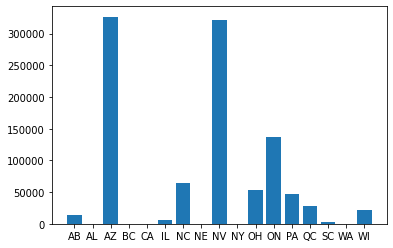

In [ ]:
plt.bar(stateWise.index, stateWise['user_id'])


In [ ]:
countryWise = data2.loc[data2['state'] == 'ON']
countryWise['city'] = countryWise['city']
countryWise = countryWise.groupby('city').count()

cities = countryWise.index.to_list()
cities = [c.lower() for c in cities]

countryWise['city'] = cities

countryWise

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,user_id,business_id,rating_x,date,name,address,state,postal_code,latitude,longitude,rating_y,review_count,is_open,attributes,categories,hours,review_cnt,yelping_since,useful,funny,cool,fans,avg_user_rating,yrs_elite,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_funny,compliment_writer,compliment_photos,years_elite,city
city,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Agincourt,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,agincourt
Ajax,536,536,536,536,536,536,536,536,536,536,536,536,536,531,536,483,536,536,536,536,536,536,536,536,536,536,536,536,536,536,536,536,536,536,536,ajax
Aurora,438,438,438,438,438,438,438,438,438,438,438,438,438,435,438,422,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,438,aurora
Beeton,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,beeton
Bolton,84,84,84,84,84,84,84,84,84,84,84,84,84,80,84,78,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,bolton
Bradford,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,10,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,bradford
Bradford West Gwillimbury,28,28,28,28,28,28,28,28,28,28,28,28,28,26,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,bradford west gwillimbury
Brampton,2102,2102,2102,2102,2102,2102,2102,2102,2102,2102,2102,2102,2102,2059,2102,1907,2102,2102,2102,2102,2102,2102,2102,2102,2102,2102,2102,2102,2102,2102,2102,2102,2102,2102,2102,brampton
Brooklin,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,brooklin


(array([     0.,  20000.,  40000.,  60000.,  80000., 100000.]),
 <a list of 6 Text major ticklabel objects>)

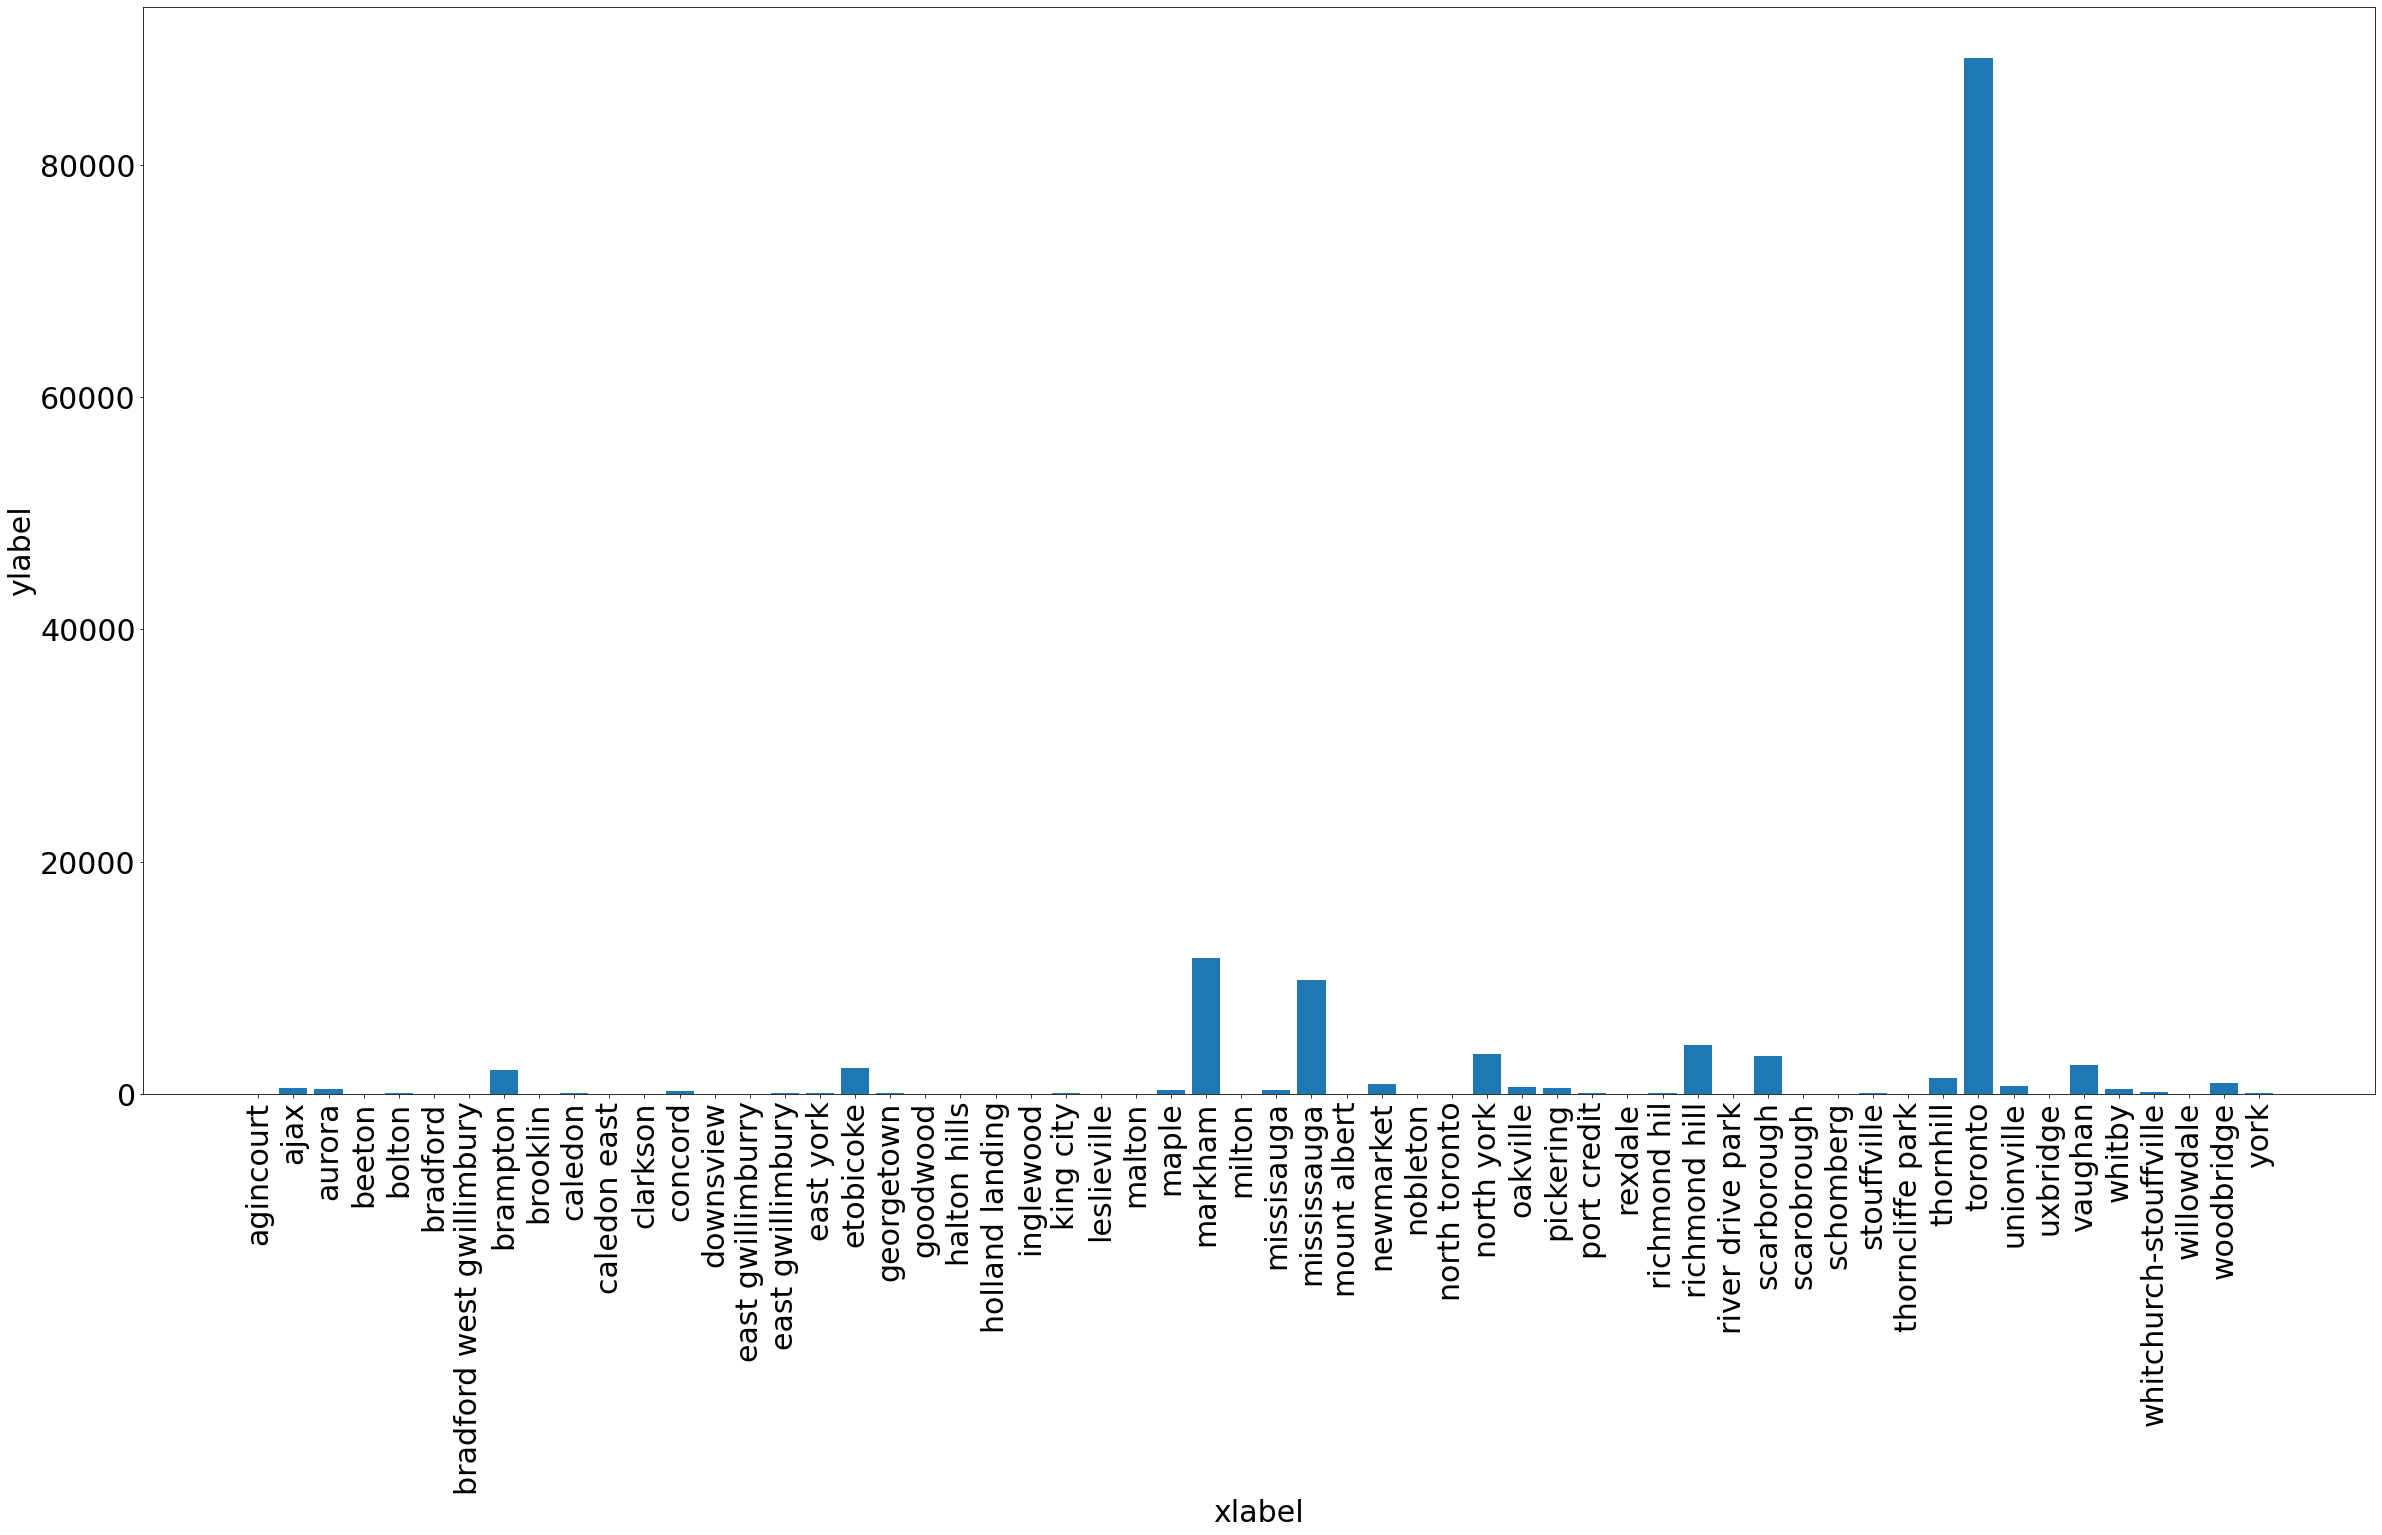

In [ ]:
plt.figure(figsize=(40,20))
plt.xlabel('city', fontsize=30)
plt.ylabel('Number of Frequency', fontsize=30)
plt.bar(countryWise['city'], countryWise['user_id'])
plt.xticks(fontsize=30, rotation=90)
plt.yticks(fontsize=30, rotation=0)

In [ ]:
userList = data2.user_id.to_list()
uniqueList = set(userList)
len(uniqueList)

263515

In [ ]:
# userRating = dict()
# userRating['less than 5'] = 0
# userRating['5-10'] = 0
# userRating['10-15'] = 0
# userRating['15-20'] = 0
# userRating['greater than 20'] = 0

# for index, row in userRatingCount.iterrows():
#   if row['business_id'] < 5:
#     userRating['less than 5'] = userRating['less than 5'] + 1
#   elif row['business_id'] < 10:
#     userRating['5-10'] = userRating['5-10'] + 1
#   elif row['business_id'] < 15:
#     userRating['10-15'] = userRating['10-15'] + 1
#   elif row['business_id'] < 20:
#     userRating['15-20'] = userRating['15-20'] + 1
#   else:
#     userRating['greater than 20'] = userRating['greater than 20'] + 1
# userRating

In [ ]:
%cd '/content/drive/Shared drives/Fall2020DSGirlPower/SI650/project/DATA/TO_data/'

/content/drive/Shared drives/Fall2020DSGirlPower/SI650/project/DATA/TO_data


In [ ]:
reviews = pd.read_csv("reviews_TO_act.csv")
bus = pd.read_csv("business.csv")
user = pd.read_csv("user.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
data2 = pd.merge(reviews, bus, left_on='business_id', right_on='business_id', how='left')
data2 = pd.merge(data2, user, left_on='user_id', right_on='user_id', how='left')

In [ ]:
#here we take only the users that have rated more than 5 movies 
user_counts_2 = data2["user_id"].value_counts()
active_users_2 = user_counts_2.loc[user_counts_2 >= 5].index.tolist()

data2['isActive'] = data2.user_id.isin(active_users_2).astype(int)
data3 = data2[data2.loc[:,'isActive'] == 1]
data3 = data3.iloc[:,:36]
data3.shape

In [ ]:
data3["business_id"].value_counts()

In [ ]:
user_counts

In [ ]:
data2.head()

,Unnamed: 0_x,user_id,business_id,rating_x,date,text,Unnamed: 0_y,name,address,city,state,postal_code,latitude,longitude,rating_y,review_count,is_open,attributes,categories,hours,Unnamed: 0,review_cnt,yelping_since,useful,funny,cool,fans,avg_user_rating,yrs_elite,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_funny,compliment_writer,compliment_photos
0,25,TZQSUDDcA4ek5gBd6BzcjA,qUWqjjjfpB2-4P3He5rsKw,4.0,2017-06-06 19:04:10,"In the heart of Chinatown, I discovered it enr...",19804,Levetto,"382 Spadina Avenue, Main Floor",Toronto,ON,M5T 2G5,43.655289,-79.399303,4.0,145,1,"{'Caters': 'True', 'RestaurantsAttire': ""u'cas...","Pizza, Italian, Salad, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",17906,136,2011-05-16 02:07:47,331,63,136,16,4.11,"2013,2014,2015,2016,2017,2018",11,3,0,1,0,10,14,15,11,4
1,53,AdMCAKmNDIaubYPxnjTq1g,nIIuxIn5RU0j-XkDWh3hlA,1.0,2018-10-04 14:12:57,Passed by here after we went to raijin ramen a...,4751,7 Baker,3 Wellesley Street W,Toronto,ON,M4Y 1E8,43.664796,-79.384810,3.0,47,1,"{'BikeParking': 'False', 'RestaurantsTakeOut':...","Coffee & Tea, Patisserie/Cake Shop, Bakeries, ...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-20:0', '...",164526,20,2014-06-27 21:22:56,1,0,0,0,3.20,NaN,0,0,0,0,0,0,0,0,0,0
2,101,1kNsEAhGU8d8xugMuXJGFA,cDoo0Pf1d_P79Rq3ZNk-Mw,3.0,2013-07-13 00:57:45,"Sigh. This review was tough to give, as it cou...",12073,Kirei Sushi + Bar,81 Church Street,Toronto,ON,M5C 2G2,43.651598,-79.374898,3.5,56,0,"{'RestaurantsPriceRange2': '2', 'NoiseLevel': ...","Japanese, Restaurants, Sushi Bars","{'Monday': '11:30-23:0', 'Tuesday': '11:30-23:...",25479,1267,2011-01-26 01:17:19,1350,406,494,50,3.34,"2012,2013,2014,2015,2016,2017,2018",16,4,2,0,1,38,33,28,20,5
3,114,Eg_VTAQwK3CxYTORNRWd2g,4m_hApwQ054v3ue_OxFmGw,5.0,2013-02-21 23:37:18,"Excellent food, service and ambiance! The tapa...",4198,Patria,480 King Street W,Toronto,ON,M5V 1L7,43.645424,-79.396221,4.0,472,1,"{'RestaurantsGoodForGroups': 'True', 'Caters':...","Restaurants, Spanish, Bars, Wine Bars, Nightli...","{'Monday': '17:30-0:0', 'Tuesday': '17:30-22:3...",87444,17,2011-07-25 16:13:40,6,0,2,0,3.44,NaN,0,0,0,0,0,1,0,0,0,0
4,148,RRhco4irDXPk5EJmvuwr2w,PMPMHHLe9vFzcR67iCjgLA,5.0,2016-01-17 05:23:59,Been to this a couple of times. Excellent food...,5942,Faryab Kabab,"1801 Lawrence Avenue E, Unit 1",Toronto,ON,M1R,43.742424,-79.305222,4.0,8,1,"{'RestaurantsAttire': ""u'casual'"", 'OutdoorSea...","Lebanese, Kebab, Persian/Iranian, Middle Easte...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",89139,32,2015-09-06 19:42:22,24,4,9,0,3.06,NaN,0,0,0,0,0,0,1,1,0,0


In [ ]:
x = data2['rating_y']

Text(0.5, 1.0, 'Business Rating distribution')

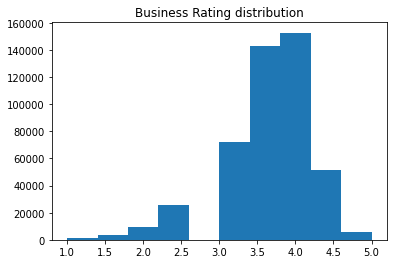

In [ ]:
plt.hist(x)
plt.title("Business Rating distribution") 